In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [79]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Data Loading


In [80]:
data = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [81]:
data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [82]:
batch_size = 100
train_loader = DataLoader(data, batch_size=batch_size, shuffle=True)

In [83]:
train_img = next(iter(train_loader))[0]
train_label = next(iter(train_loader))[1]

In [84]:
train_img.to(device)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

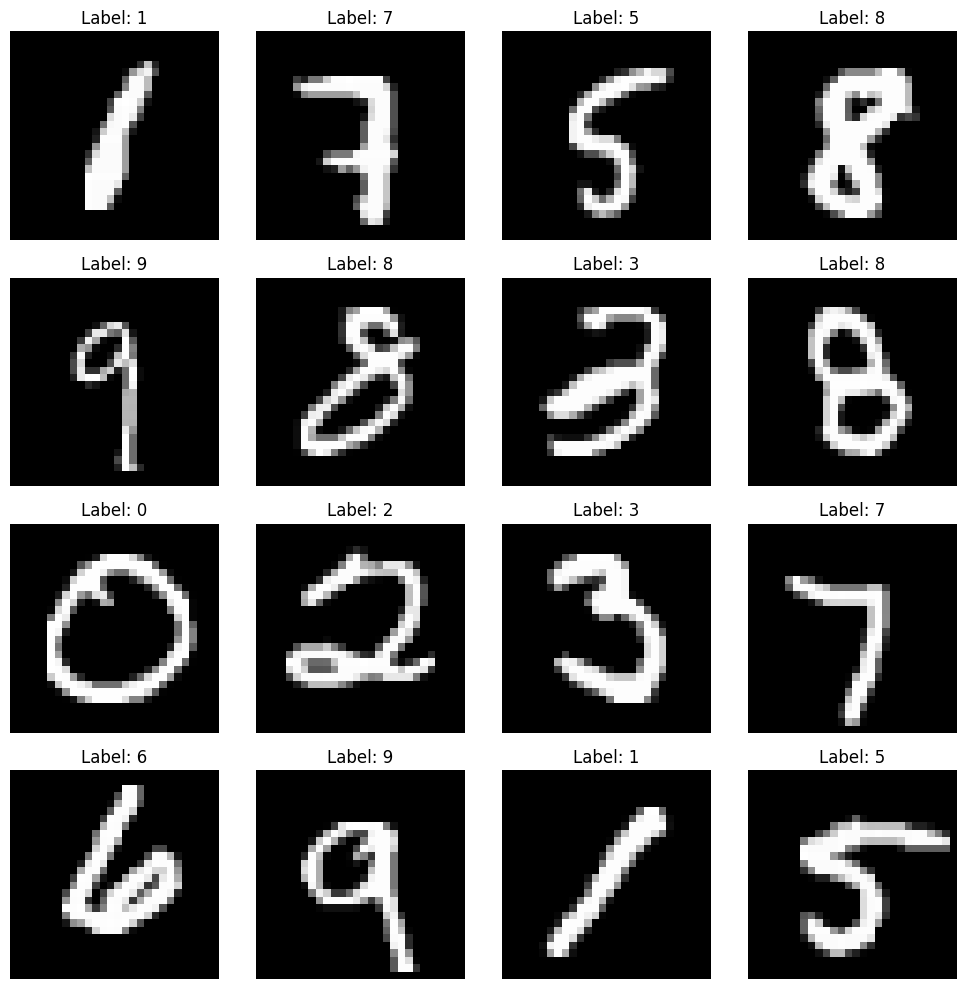

In [85]:


# Display a grid of images
def show_grid(loader):
    images, labels = next(iter(loader))
    grid_size = min(batch_size, 16)  # Show at most 16 images
    plt.figure(figsize=(10, 10))
    for i in range(grid_size):
        plt.subplot(4, 4, i+1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title(f'Label: {labels[i].item()}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_grid(train_loader)

In [86]:
x_train, x_test, y_train, y_test = train_test_split(train_img, train_label, test_size=0.2, random_state=42)

In [87]:
# Encoder -> Gaussian Noise -> latent space -> Decoder
class AE(nn.Module):
    def __init__(self):
        super(AE,self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 32, 3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 64, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        compressed = self.encoder(x)
        decompressed = self.decoder(compressed)
        return decompressed


In [88]:
model = AE()
Loss = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=1e-3)

In [89]:
loss_set1 = []
epochs = 10
for epoch in range(epochs):
  for batch in train_img:
    
    batch = batch.reshape(1,1,28,28)
    batch.to(device)
    compressed = model(batch)
    loss = Loss(compressed, batch)
    print(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  if epoch % 10 == 0:
    loss_set1.append(loss.item())

0.24089837074279785
0.2371409684419632
0.22563712298870087
0.2171192318201065
0.22311142086982727
0.2118888944387436
0.20285077393054962
0.1924399733543396
0.18814603984355927
0.17952045798301697
0.17342649400234222
0.1461496353149414
0.1517474353313446
0.14860878884792328
0.14873279631137848
0.140705406665802
0.16711419820785522
0.14327578246593475
0.12427152693271637
0.15206994116306305
0.12763574719429016
0.14593671262264252
0.13925491273403168
0.09850651770830154
0.0789291113615036
0.09227351099252701
0.07774952799081802
0.1053219884634018
0.07751902937889099
0.08722206950187683
0.09966401755809784
0.16426211595535278
0.10745856165885925
0.06860144436359406
0.09799347817897797
0.06759388744831085
0.06290110945701599
0.050673339515924454
0.05052771046757698
0.06562729179859161
0.06901391595602036
0.04837188869714737
0.048861999064683914
0.050868161022663116
0.06337551027536392
0.03813505545258522
0.06569382548332214
0.042464856058359146
0.039698339998722076
0.05830049514770508
0.051